<a href="https://colab.research.google.com/github/gantaphani/Phanesh_INFO5502_Spring2022/blob/main/INFO_5502_Final_Exam_Spring2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### INFO 5502 Final Exam (05/12/2022, 240 points in total)

<span style='background:yellow'>**Question 1 (40 pt).**</span> We want to create a birthday frequency graph using the data on births in the United States, provided by the Centers for Disease Control (CDC). You can download the data from my GitHub link:https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/births.csv 

Please visualize the data as the following figure using python (you can use any data visualization packages):


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [51]:
df=pd.read_csv('https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/births.csv',sep=',')
print(df.head(5).to_string())

   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548


In [52]:
print(df.isnull().sum())
print('\nNote there are null values, so need to delete them')

year        0
month       0
day       480
gender      0
births      0
dtype: int64

Note there are null values, so need to delete them


In [53]:
df.dropna(inplace=True)
print(df.isnull().sum())
print('\nNote there are no null values')

year      0
month     0
day       0
gender    0
births    0
dtype: int64

Note there are no null values


In [54]:
#visualizing birth frequency
parts = np.percentile(df['births'], [20, 40, 60])
mu, sigma = parts[1], 0.7* (parts[2] - parts[0])
births = df.query('(births>@mu-4*@sigma) & (births<@mu+4*@sigma)')
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')

birthsByDate = births.pivot_table('births', [births.index.month, births.index.day])
birthsByDate.index = [pd.datetime(2012, month, day) for (month, day) in birthsByDate.index]

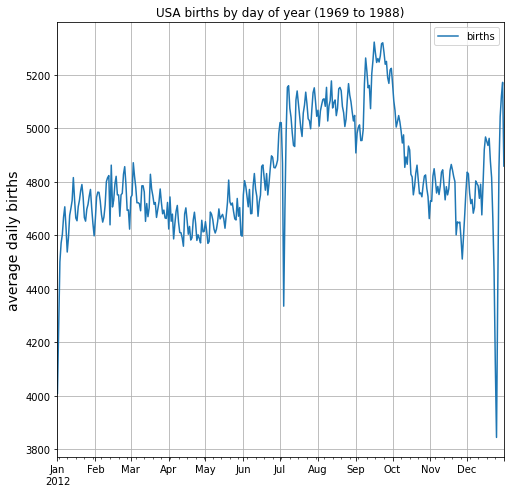

In [55]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.title("USA births by day of year (1969 to 1988)")
plt.ylabel('average daily births',fontsize=14)
birthsByDate.plot(ax=ax)
plt.grid()
plt.show()

<span style='background:yellow'>**Question 2 (40 pt).**</span> Write a python program to evaluate the text classification performance using accuracy, precision, recall, and f1 score. 

Accuracy = (TP + TN) / (TP+ TN+ FP+ FN)

Recall = (TP) / (TP+FN)

Precision = (TP) / (TP+FP)

F1 Score = (2*Precision*Recall) / (Precision + Recall)

Here is the confusion matrix of a text classfication task (six categories) on the testing data. 


In [56]:
import numpy as np
confusionMatrix = [[157,46,25,22,15,3],
              [28,151,45,18,1,6],
              [11,38,135,14,3,7],
              [11,15,18,70,6,4],
              [14,12,14,7,56,2],
              [12,7,6,5,5,16]]

conf = np.array(confusionMatrix)
for i in range(len(conf)):
    
    accr = 0
    Precision = 0
    Recall = 0
    f1score = 0
    
    TP = conf[i,i]
    FP = conf[i,:].sum()-TP
    FN = conf[:,i].sum()-TP
    TN = conf.sum().sum()-(TP+FP+FN)
    
    accr = (TP+TN)/(TP+ TN+ FP+ FN)
    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    f1score = 2*Precision*Recall/(Precision+Recall)
       
    print(f'The f1 score of class{i} is {f1score}')
    print(f'The recall of class{i} is {Recall}')
    print(f'The precision of class{i} is {Precision}')
    print(f'The accuracy of class{i} is {accr}')

The f1 score of class0 is 0.626746506986028
The recall of class0 is 0.6738197424892703
The precision of class0 is 0.585820895522388
The accuracy of class0 is 0.8139303482587065
The f1 score of class1 is 0.583011583011583
The recall of class1 is 0.5613382899628253
The precision of class1 is 0.606425702811245
The accuracy of class1 is 0.7850746268656716
The f1 score of class2 is 0.598669623059867
The recall of class2 is 0.5555555555555556
The precision of class2 is 0.6490384615384616
The accuracy of class2 is 0.8199004975124378
The f1 score of class3 is 0.5384615384615384
The recall of class3 is 0.5147058823529411
The precision of class3 is 0.5645161290322581
The accuracy of class3 is 0.8805970149253731
The f1 score of class4 is 0.5863874345549738
The recall of class4 is 0.6511627906976745
The precision of class4 is 0.5333333333333333
The accuracy of class4 is 0.9213930348258706
The f1 score of class5 is 0.3595505617977528
The recall of class5 is 0.42105263157894735
The precision of clas

<span style='background:yellow'>**Question 3 (100 pt, each sub-question is 10 pt).**</span> 

Part A: Given Inetd dataset, an intrusion detection dataset that contains 2 columns. The first column represents a process ID number (PID) and the second column represents a system call. The goal is to extract the entire system call sequence by its PID, then tokenize and parse each sequence into 25-grams. After this, we’ll split the data into training and testing sets. Next, we ensure data quality in the training dataset by removing duplicate sequences within each class and overlapped sequences between both classes. To ensure a fair evaluation, we also clean the testing set by repeating the previous step. You will implement a Decision Tree model to train and test on the training set and testing set that we just clean. 


Part B: As the data type is sequential, we want to know how similar the sequences from both classes are and visualize how the similarity scores vary in different sequence lengths. Compute a cosine similarity score of 100 random pairs from both classes and get a median cosine similarity. Repeat this step in different sequence lengths (5, 10, 15, and 20). Plot a line chart to visualize how the median cosine similarities vary through sequence lengths of 5 to 25. 

You can download the datasets from github: https://github.com/unt-iialab/info5502-spring2022/tree/main/finalexam/q4


Step by step instructions and questions:

(1) Attached are the Normal and Intrusion data folders. Read in the data and store them in two separate dataframes. Combine the system calls (the second column) from the same PID (the first column) into a sequence or a string. 

(2) Parse an entire sequence into smaller sequences of size 25. (Hint: Use word_tokenize and ngrams from nltk library to parse).

(3) Add labels to the data, and partition the labeled data into training data and testing data with a ratio of 70/30.

(4) As the dataset has a lot of duplicate sequences, make sure that the testing data only contain unique sequences and that these sequences do not exist in the training data. Condense training data and testing data into two sets. Take the difference between the testing set and training set to remove the overlapped sequences from the testing data. 

(5) The sequences from each class can be repetitive, and some of these sequences may have different labels. Therefore, we need to remove the duplicate sequences within each class and the overlapped sequences from the Intrusion class. Start out by separating the Normal class and Intrusion class in the training data. Use the same concept in Question 4 to remove duplicate sequences and overlapped sequences from the training data.

(6) Repeat Question 5 to clean the testing data.

(7) Bootstrap the training data to get the same number of sequences from each class. Train and evaluate a Decision Tree model using the training data and testing data that we just clean. How is the performance?

(8) Randomly sample 100 pairs of sequences from both classes and calculate the median cosine similarity.

(9) Refer back to Question 2, parse the data into a length of 5, 10, 15, and 20. Clean the data from each class using Question 5. For each sequence length, calculate the median cosine similarity of 100 random pairs of sequences from both classes. 

(10) Plot a line chart to visualize how the median cosine similarities vary through different sequence lengths from 5 to 25.


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import math
import re
from nltk.util import ngrams
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
normalSet=pd.read_csv('https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/q4/inetd-normal.int',sep=' ',header=None)
print(str("!!!NORMAL SET!!!").center(100))
print(normalSet.head(5).to_string())
intrusionSet=pd.read_csv('https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/q4/inetd-intrusion.int',sep=' ',header=None)
print(str("!!!INTRUSION SET!!!").center(100))
print(intrusionSet.head(5).to_string())

                                          !!!NORMAL SET!!!                                          
     0    1
0  167   90
1  167  125
2  167  125
3  167  106
4  167    5
                                        !!!INTRUSION SET!!!                                         
     0    1
0  167   90
1  167  125
2  167  125
3  167  106
4  167    5


In [34]:
normalSet.rename(columns = {0:'PID', 1:'System Call'}, inplace = True)
intrusionSet.rename(columns = {0:'PID', 1:'System Call'}, inplace = True)

In [35]:
intrusion_dict = {}
normal_dict = {}

# combining system calls
for pid in list(set(intrusionSet['PID'].values)):
    intrusion_dict[pid] = " ".join(str(value) for value in list(intrusionSet[intrusionSet['PID'] == pid]['System Call'].values))

for pid in list(set(normalSet['PID'].values)):
    normal_dict[pid] = " ".join(str(value) for value in list(normalSet[normalSet['PID'] == pid]['System Call'].values))

intrusion_dict[167]

'90 125 125 106 5 90 6 5 3 90 90 90 90 6 125 91 125 125 125 136 49 24 47 50 45 45 5 106 106 106 106 106 2 1'

In [36]:
import re
from nltk.util import ngrams
intrusion_list = []
normal_list = []

# generating ngrams with sequence length of 25

for key in intrusion_dict.keys():
    s = intrusion_dict[key]
    tokens = [token for token in s.split(" ") if token != ""]
    
    for ele in list(ngrams(tokens, 25)):
        intrusion_list.append(ele)
        
for key in normal_dict.keys():
    s = normal_dict[key]
    tokens = [token for token in s.split(" ") if token != ""]
    
    for ele in list(ngrams(tokens, 25)):
        normal_list.append(ele) 

print(len(intrusion_list))
print(len(normal_list))

7627
469


In [37]:
#Checking For Null Values in both the datasets
print(normalSet.any().isna())
print('Note there are no null values in the Normal Dataset\n')
print(intrusionSet.any().isna())
print('Note there are no null values in the Intrusion Dataset')

PID            False
System Call    False
dtype: bool
Note there are no null values in the Normal Dataset

PID            False
System Call    False
dtype: bool
Note there are no null values in the Intrusion Dataset


In [38]:
#Checking For Duplicate values in both the datasets
print(str("Before updating the dataset").center(100))
print(normalSet[normalSet.duplicated()])
print('Note there are Duplicates in the Normal Dataset\n')
print(intrusionSet[intrusionSet.duplicated()])
print('Note there are Duplicates in the Intrusion Dataset\n')

                                    Before updating the dataset                                     
      PID  System Call
2     167          125
5     167           90
7     167            5
9     167           90
10    167           90
..    ...          ...
535  2669            6
536  2669            6
537  2669            6
538  2669            6
539  2669            6

[489 rows x 2 columns]
Note there are Duplicates in the Normal Dataset

       PID  System Call
2      167          125
5      167           90
7      167            5
9      167           90
10     167           90
...    ...          ...
8365  4470            6
8366  4470            6
8367  4470            6
8368  4470            6
8369  4470            6

[8018 rows x 2 columns]
Note there are Duplicates in the Intrusion Dataset



In [39]:
print(str('Before deleting the duplicates').center(100))
print('Size of Normal Dataset',normalSet.shape)
print('Size of Intrusion Dataset',intrusionSet.shape)

                                   Before deleting the duplicates                                   
Size of Normal Dataset (541, 2)
Size of Intrusion Dataset (8371, 2)


In [40]:
normalSet.drop_duplicates(inplace=True)
intrusionSet.drop_duplicates(inplace=True)

In [41]:
#Checking For Duplicate values in both the datasets
print(str("After updating the dataset").center(100))
print(normalSet[normalSet.duplicated()])
print('Note there are no Duplicates in the Normal Dataset\n')
print(intrusionSet[intrusionSet.duplicated()])
print('Note there are no Duplicates in the Intrusion Dataset\n')

                                     After updating the dataset                                     
Empty DataFrame
Columns: [PID, System Call]
Index: []
Note there are no Duplicates in the Normal Dataset

Empty DataFrame
Columns: [PID, System Call]
Index: []
Note there are no Duplicates in the Intrusion Dataset



In [42]:
print(str('After deleting the duplicates').center(100))
print('Size of Normal Dataset',normalSet.shape)
print('Size of Intrusion Dataset',intrusionSet.shape)

                                   After deleting the duplicates                                    
Size of Normal Dataset (52, 2)
Size of Intrusion Dataset (353, 2)


In [43]:
combinedDataset = normalSet.append(intrusionSet, ignore_index=True)
combinedDataset['System Call'] = combinedDataset['System Call'].astype(str)
combinedDataset['System Call'] = combinedDataset.groupby('PID')['System Call'].transform(lambda x: ','.join(x))
combinedDataset.drop_duplicates(inplace=True)
print(combinedDataset.head(5))

      PID                                        System Call
0     167  90,125,106,5,6,3,91,136,49,24,47,50,45,2,1,90,...
15    168  66,12,5,63,6,20,108,90,4,91,76,3,126,45,19,102...
41   2669                    126,5,45,108,90,3,19,6,91,63,11
93   4121                    126,5,45,108,90,3,19,6,91,63,11
104  4152                    126,5,45,108,90,3,19,6,91,63,11


In [44]:
Features=normalSet[['PID']]
Targets=normalSet['System Call']

In [45]:
#Splitting the dataset into training and test sets
TrainFeatures,TestFeatures,TrainTargets,TestTargets=train_test_split(Features,Targets,test_size = 0.30, random_state = 42)
print("Training Features Shape",TrainFeatures.shape)
print("Training Targets Shape",TrainTargets.shape)
print("Testing Features Shape",TestFeatures.shape)
print("Testing Targets Shape",TestTargets.shape)

Training Features Shape (36, 1)
Training Targets Shape (36,)
Testing Features Shape (16, 1)
Testing Targets Shape (16,)


In [46]:
#Building and Training the Decision Tree Regression Model
dt=DecisionTreeRegressor(max_depth=10)
dt.fit(TrainFeatures,TrainTargets)
#Predicting on the Test Set and calcualting root mean squared error
decisionPredictedValues=dt.predict(TestFeatures)
decisionPredictedValues

array([61.47619048, 44.85714286, 44.85714286, 72.375     , 44.85714286,
       72.375     , 61.47619048, 44.85714286, 72.375     , 61.47619048,
       72.375     , 72.375     , 61.47619048, 72.375     , 61.47619048,
       72.375     ])

In [47]:
#Root Mean Squared Error for Decision Tree Regression Model
RMSE=math.sqrt(np.square(np.subtract(decisionPredictedValues,TestTargets)).mean())
print("RMSE Error",RMSE)
print("Model Score",dt.score(TrainFeatures,TrainTargets))

RMSE Error 48.93622689411712
Model Score 0.042935653664576634


In [48]:
cosineSimilarNgram = {}

for ngram in range(5, 26, 5):

    intrusionSet = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/q4/inetd-intrusion.int", sep = " ", header = None)
    normalSet = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/q4/inetd-normal.int", sep = " ", header = None)

    normalSet.rename(columns = {0:'PID', 1:'System Call'}, inplace = True)
    intrusionSet.rename(columns = {0:'PID', 1:'System Call'}, inplace = True)

    normalDict = {}
    intrusionDict = {}

    for pid in list(set(normalSet['PID'].values)):
        normalDict[pid] = " ".join(str(value) for value in list(normalSet[normalSet['PID'] == pid]['System Call'].values))

    for pid in list(set(intrusionSet['PID'].values)):
        intrusionDict[pid] = " ".join(str(value) for value in list(intrusionSet[intrusionSet['PID'] == pid]['System Call'].values))
   
    normalList = []
    intrusionList = []

    for key in normalDict.keys():
        s = normalDict[key]
        tokens = [token for token in s.split(" ") if token != ""]

        for ele in list(ngrams(tokens, ngram)):
            normalList.append(ele)

    for key in intrusionDict.keys():
        s = intrusionDict[key]
        tokens = [token for token in s.split(" ") if token != ""]

        for ele in list(ngrams(tokens, ngram)):
            intrusionList.append(ele)
    
    normal_df = pd.DataFrame(normalList)
    intrusion_df = pd.DataFrame(intrusionList)

    normal_df['class'] = 0
    intrusion_df['class'] = 1

    combined_df = pd.DataFrame()

    combined_df = combined_df.append(intrusion_df)
    combined_df = combined_df.append(normal_df)

    print(combined_df.shape)
    print()

    combined_df = combined_df.drop_duplicates(subset = combined_df.columns[:-1], keep = 'last')
    print(combined_df.shape)
    print()

    from sklearn.metrics.pairwise import cosine_similarity
    import statistics

    similarities_list = []
    for i in range(0, 100):
        list1 = list(combined_df[combined_df['class'] == 0].sample(n = 1).iloc[0, :].values)
        list2 = list(combined_df[combined_df['class'] == 1].sample(n = 1).iloc[0, :].values)
        try:
            similarities_list.append(cosine_similarity([list1], [list2]))
        except Exception as e:
            print(e)
            print(list1, list2)

    print(statistics.median(similarities_list)[0][0])
    print()
    cosineSimilarNgram[ngram] = statistics.median(similarities_list)[0][0]

(8776, 6)

(168, 6)

0.7995498059163749

(8606, 11)

(213, 11)

0.718674840354171

(8436, 16)

(254, 16)

0.6962768351489168

(8266, 21)

(293, 21)

0.7223210475101314

(8096, 26)

(333, 26)

0.7191911106105028



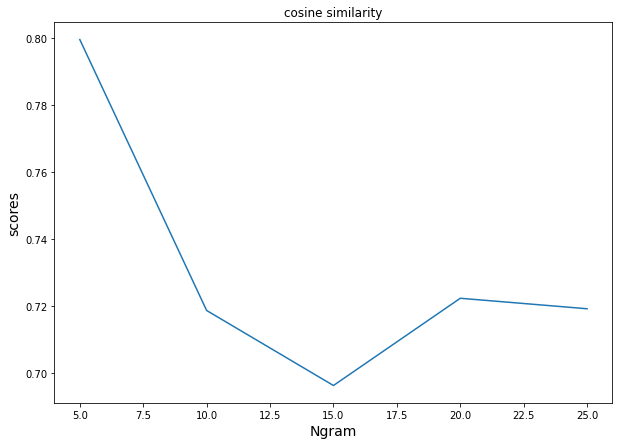

In [49]:
cosine_similar_ngram_df = pd.DataFrame({"Ngram":list(cosineSimilarNgram.keys()), "Similarity_scores": list(cosineSimilarNgram.values())})
plt.rcParams['figure.figsize'] = [10, 7]

sns.lineplot(x = "Ngram", y = "Similarity_scores", data = cosine_similar_ngram_df)

plt.xlabel("Ngram",fontsize=14)
plt.ylabel("scores",fontsize=14)    
plt.title("cosine similarity")
plt.show()

<span style='background:yellow'>**Question 4 (60 pt, each sub-question is 20 pt).**</span> In the world of business, the importance of the customers’ reviews for any product is not ignorable. The impact of customers’ reviews on customer’s decision making is significant. Therefore, businesses try to increase this impact by increasing the ratio of the positive reviews to negative reviews. One effective way to increase the ratio is offering the incentives such as small gifts or free next services to customers to post the reviews for item they purchase or used. However, it is not always the case, and customer may post their reviews without receiving or accepting the incentives. So, the reviews could be in either incentivized or non-incentivized category.


Considering the importance of reviews, in this question you need to compare these two categories of reviews. One method to compare the effectiveness of two categories is conducting the A/B testing.


The Software_Reviews dataset is collected from software review products, and it is combination of several small datasets. Find the dataset as an attachment on the left side of the page.


You can downlaod the dataset from github: https://github.com/unt-iialab/info5502-spring2022/blob/main/finalexam/Software_Reviews_csv_files_S.csv

(1) Clean the dataset before you use (You need to know this dataset is combinations of the several CSV files with title rows. So, there are extra title rows in the middle of the file, which they need to be removed.)


(2) Apply an A/B test": consider the “incentivized” column as main column for A & B groups.

a. The “incentivized” column includes ‘NominalGift’, ‘VendorReferredIncentivized’, ‘NoIncentive’, ‘NonNominalGift’, ‘VendorReferred’, ‘None’

b. Group A (Incentive): ‘NominalGift’, and ‘VendorReferredIncentivized’

c. Group B (NoIncentive): ‘NoIncentive’, ‘NonNominalGift’, ‘VendorReferred’

d. Make the decision if ‘None’ includes in either Group A or B or remove that.

e. The “OverAllRating” is another column that is used to compare groups A and B.

Which one A or B group has higher “OverAllRating”?


(3) Draw the A/B testing related visualizations.

In [57]:
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [58]:
reviews=pd.read_csv('https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/Software_Reviews_csv_files_S.csv',sep=',')
print(str("!!!Reviews SET!!!").center(100))
print(reviews.head(5).to_string())

                                         !!!Reviews SET!!!                                          
   Unnamed: 0 Unnamed: 0.1       id     status         global_review_id hash_global_review_id listing_id                                                                                      title is_rating     score     created OverAllRating Value For Money Ease of Use Features Customer Support Likelihood to recommned isAnonymous is_verified   full_name                     company_industry frequency_of_use    time_used          source incentivized ReviewDescription_score   Pros_score   Unnamed: 27
0         0.0            0    13879  Published           GetApp___14383            f7535d1342      90666                                                          The best CRM solution we've found     FALSE  4.462893   8/25/2015             5               5           5        0                5                       0       FALSE        TRUE   Marcus B.  Information Technology and Services    

In [59]:
#Checking For Null Values in both the datasets
print(reviews.isnull().sum())
print('\nNote there are null values in the reviews Dataset,so need to delete them')

Unnamed: 0                  11
Unnamed: 0.1                 0
id                           0
status                       0
global_review_id             0
hash_global_review_id        0
listing_id                   0
title                      128
is_rating                    0
score                        0
created                      0
OverAllRating                0
Value For Money              0
Ease of Use                  0
Features                     0
Customer Support             0
Likelihood to recommned      0
isAnonymous                  0
is_verified                  0
full_name                    0
company_industry           476
frequency_of_use           424
time_used                  313
source                       0
incentivized               667
ReviewDescription_score      0
Pros_score                   0
Unnamed: 27                 11
dtype: int64

Note there are null values in the reviews Dataset,so need to delete them


In [60]:
reviews.dropna(inplace=True)

In [61]:
#Checking For Null Values in both the datasets
print(reviews.isnull().sum())
print('\nNote there are no null values in the reviews Dataset')

Unnamed: 0                 0
Unnamed: 0.1               0
id                         0
status                     0
global_review_id           0
hash_global_review_id      0
listing_id                 0
title                      0
is_rating                  0
score                      0
created                    0
OverAllRating              0
Value For Money            0
Ease of Use                0
Features                   0
Customer Support           0
Likelihood to recommned    0
isAnonymous                0
is_verified                0
full_name                  0
company_industry           0
frequency_of_use           0
time_used                  0
source                     0
incentivized               0
ReviewDescription_score    0
Pros_score                 0
Unnamed: 27                0
dtype: int64

Note there are no null values in the reviews Dataset


In [62]:
#Checking For Duplicate values in the datasets
print(reviews[reviews.duplicated()])
print('Note there are no Duplicates in the Reviews Dataset\n')

Empty DataFrame
Columns: [Unnamed: 0, Unnamed: 0.1, id, status, global_review_id, hash_global_review_id, listing_id, title, is_rating, score, created, OverAllRating, Value For Money, Ease of Use, Features, Customer Support, Likelihood to recommned, isAnonymous, is_verified, full_name, company_industry, frequency_of_use, time_used, source, incentivized, ReviewDescription_score, Pros_score, Unnamed: 27]
Index: []

[0 rows x 28 columns]
Note there are no Duplicates in the Reviews Dataset



In [63]:
print(str('Group A Dataset').center(200))
ADataset=reviews.loc[(reviews['incentivized']=='NominalGift') | (reviews['incentivized']=='VendorReferredIncentivized')]
print(ADataset.head(5).to_string())

                                                                                            Group A Dataset                                                                                             
    Unnamed: 0 Unnamed: 0.1       id     status         global_review_id hash_global_review_id listing_id                                                                                      title is_rating     score     created OverAllRating Value For Money Ease of Use Features Customer Support Likelihood to recommned isAnonymous is_verified   full_name           company_industry frequency_of_use           time_used          source incentivized ReviewDescription_score   Pros_score  Unnamed: 27
1          1.0            1  1283833  Published  SoftwareAdvice___434035            8b72a5b935      90666                                               Reasonable CRM software for small businesses     FALSE  4.462893   6/22/2018             4               5           4        4                3   

In [64]:
print(str('Group B Dataset').center(200))
BDataset=reviews.loc[(reviews['incentivized']=='NoIncentive') | (reviews['incentivized']=='VendorReferred')]
print(BDataset.head(5).to_string())

                                                                                            Group B Dataset                                                                                             
    Unnamed: 0 Unnamed: 0.1       id     status         global_review_id hash_global_review_id listing_id                                                    title is_rating     score     created OverAllRating Value For Money Ease of Use Features Customer Support Likelihood to recommned isAnonymous is_verified   full_name    company_industry frequency_of_use           time_used          source incentivized ReviewDescription_score   Pros_score  Unnamed: 27
10        10.0           10  1301781  Published  SoftwareAdvice___437237            f1a6a9cfb4      90666           Great software that covers a lot of situations     FALSE  4.462893   6/27/2018             5               0           4        4                0                       9       FALSE       FALSE  Eduardo D.  Telecommunicatio

In [65]:
ADataset['OverAllRating'] = ADataset['OverAllRating'].astype(float)
BDataset['OverAllRating'] = BDataset['OverAllRating'].astype(float)

In [66]:
con = ADataset['OverAllRating'].shape[0]
tar = BDataset['OverAllRating'].shape[0]

# Significance Level
alpha = 0.04

mean_con = np.mean(ADataset['OverAllRating'])
mean_tar = np.mean(BDataset['OverAllRating'])

variance_con = np.var(ADataset['OverAllRating'])
variance_tar = np.var(BDataset['OverAllRating'])

# Test statistics and  value
Z_crit =norm.ppf(1-alpha/2)
T=(mean_con-mean_tar)/np.sqrt(variance_con/con + variance_tar/tar)

#Variance
variance = np.sqrt(variance_con/con + variance_tar/tar)
m = Z_crit*variance
P_Value = norm.sf(T)*2
# Confidence Interval
CI = [(mean_con - mean_tar) - m, (mean_con - mean_tar) + m]

print("Test statistic: ", T)
print("Confidence Interval: ", CI)
print("Z value : ", Z_crit)
print("P value: ", P_Value)

Test statistic:  -3.53942063214399
Confidence Interval:  [-0.2212094377643422, -0.058758205647917325]
Z value :  2.0537489106318225
P value:  1.9995989936671095


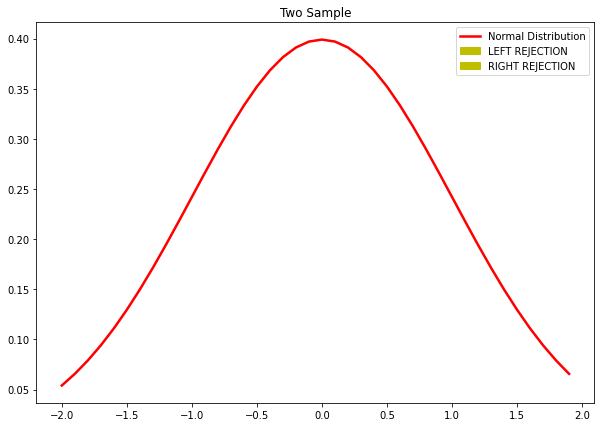

In [67]:
z = np.arange(-2,2,  0.1)
plt.plot(z, norm.pdf(z), label = 'Normal Distribution',color = 'REd',linewidth = 2.5)
plt.fill_between(z[z<(-1)*Z_crit], norm.pdf(z[z<(-1)*Z_crit]), label = 'LEFT REJECTION',color ='y' )
plt.fill_between(z[z>Z_crit], norm.pdf(z[z>Z_crit]), label = 'RIGHT REJECTION',color ='y' )
plt.title("Two Sample")
plt.legend()
plt.show()